In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file
file_path = "bar_assignment.csv"
df = pd.read_csv(file_path)

# Transform the data into a format suitable for stacking
df_pivot = df.pivot_table(index="LABEL", columns="COUNT", aggfunc="size", fill_value=0)
df_pivot.columns = ["No", "Yes"]  # Assuming 0 represents 'No' and 1 represents 'Yes'
df_pivot.reset_index(inplace=True)

# Create the figure
fig = go.Figure()

# Add 'Yes' (Blue) second (Stacked on top of 'No')
fig.add_trace(go.Bar(
    y=df_pivot['LABEL'],
    x=df_pivot['Yes'],
    name='Yes',
    orientation='h',
    marker=dict(color='blue'),
    text=df_pivot['Yes'],
    textposition='inside',
    base=df_pivot['No']  # Stacked on 'No'
))

# Add 'No' (Red) first (This should be the base layer)
fig.add_trace(go.Bar(
    y=df_pivot['LABEL'],
    x=df_pivot['No'],

    name='No',
    orientation='h',
    marker=dict(color='red'),
    text=df_pivot['No'],
    textposition='inside',
    base=0  # Ensure it starts from 0
))


fig.update_layout(
    barmode='stack',
    title='Bar Graph',
    xaxis_title='Count',
    yaxis_title='Labels',
    legend=dict(
        x=0.1,  # Moves the legend to the left
        y=1.1,  # Keeps it at the top
        xanchor='left',  # Aligns the left edge of the legend with the chart
        yanchor='top',  # Aligns the top of the legend
        orientation="h"  # Keeps the legend horizontal (change to "v" for vertical)
    )
)
# Show the chart
fig.show()


In [23]:
import pandas as pd
import plotly.graph_objects as go

# Load the transformed data from CSV
file_path = "sankey_assignment.csv"
df = pd.read_csv(file_path)

# Define the categories
sources = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
middle_labels = df["LABEL"].unique().tolist()  # Extract the middle layer nodes
targets = ['Reg', 'Aca', 'Oth']

# Create a list to store the Sankey links
sankey_data = []

# First, connect sources to middle labels
for _, row in df.iterrows():
    for source in sources:
        value = row[source]
        if value > 0:  # Only include valid connections
            sankey_data.append([source, row["LABEL"], value])

# Then, connect middle labels to targets
for _, row in df.iterrows():
    label = row["LABEL"]
    for target in targets:
        value = row[target]
        if value > 0:
            sankey_data.append([label, target, value])

# Convert the structured data to a DataFrame
sankey_df = pd.DataFrame(sankey_data, columns=["Source", "Target", "Value"])

# Create a mapping of unique labels to index values for the Sankey diagram
all_nodes = sources + middle_labels + targets  # Ensure order reflects flow
node_dict = {name: i for i, name in enumerate(all_nodes)}

# Convert source & target labels to indices
sankey_df["Source_Index"] = sankey_df["Source"].map(node_dict)
sankey_df["Target_Index"] = sankey_df["Target"].map(node_dict)

# Define a distinct color mapping dictionary for sources, middle nodes, and targets
color_map = {
    # Source node colors
    "PS": "rgba(255, 0, 0, 0.6)",  # Red
    "OMP": "rgba(255, 165, 0, 0.6)",  # Orange
    "CNP": "rgba(0, 255, 0, 0.6)",  # Green
    "NRP": "rgba(0, 0, 255, 0.6)",  # Blue
    "NMCCC": "rgba(75, 0, 130, 0.6)",  # Indigo
    "PEC": "rgba(255, 20, 147, 0.6)",  # Pink
    "NCDM": "rgba(0, 255, 255, 0.6)",  # Cyan
    "RGS": "rgba(255, 215, 0, 0.6)",  # Gold
}

# Use a **distinct** color palette for middle nodes
middle_colors = {
    middle_labels[i]: color
    for i, color in enumerate([
        "rgba(148, 0, 211, 0.6)",  # Dark Violet
        "rgba(0, 191, 255, 0.6)",  # Deep Sky Blue
        "rgba(34, 139, 34, 0.6)",  # Forest Green
        "rgba(199, 21, 133, 0.6)",  # Medium Violet Red
        "rgba(255, 69, 0, 0.6)",  # Red-Orange
        "rgba(218, 165, 32, 0.6)",  # Goldenrod
        "rgba(70, 130, 180, 0.6)",  # Steel Blue
        "rgba(128, 0, 0, 0.6)",  # Maroon
    ][:len(middle_labels)])  # Ensure we don't exceed the number of labels
}

# Assign colors to target categories
target_colors = {
    "Reg": "rgba(0, 100, 100, 0.6)",
    "Aca": "rgba(60, 50, 100, 0.6)",  # Purple
    "Oth": "rgba(255, 140, 0, 0.6)",  # Dark Orange
}

# Combine all colors into a single dictionary
color_map.update(middle_colors)  # Ensure middle nodes are well-colored
color_map.update(target_colors)  # Targets also get distinct colors

# Generate link colors:
# - Source → Middle gets **source color**
# - Middle → Target gets **middle color**
link_colors = []
for _, row in sankey_df.iterrows():
    source = row["Source"]
    target = row["Target"]

    if source in color_map and target in middle_colors:
        link_colors.append(color_map[source])  # Color from source
    elif source in middle_colors and target in target_colors:
        link_colors.append(color_map[source])  # Color from middle node
    else:
        link_colors.append("rgba(128, 128, 128, 0.6)")  # Default gray

# Assign colors to all nodes: sources, middle, and targets
node_colors = [color_map.get(n, "rgba(128, 128, 128, 0.6)") for n in all_nodes]

# Create the Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20, line=dict(color="black", width=0.5),
        label=all_nodes,  # Labels for the nodes
        color=node_colors  # Assign node colors properly
    ),
    link=dict(
        source=sankey_df["Source_Index"],  # Indices of source nodes
        target=sankey_df["Target_Index"],  # Indices of target nodes
        value=sankey_df["Value"],  # Flow values
        color=link_colors  # Assign link colors based on source & middle
    )
))

# Update layout
fig.update_layout(title_text="Sankey Diagram", font_size=12)

# Show the diagram
fig.show()


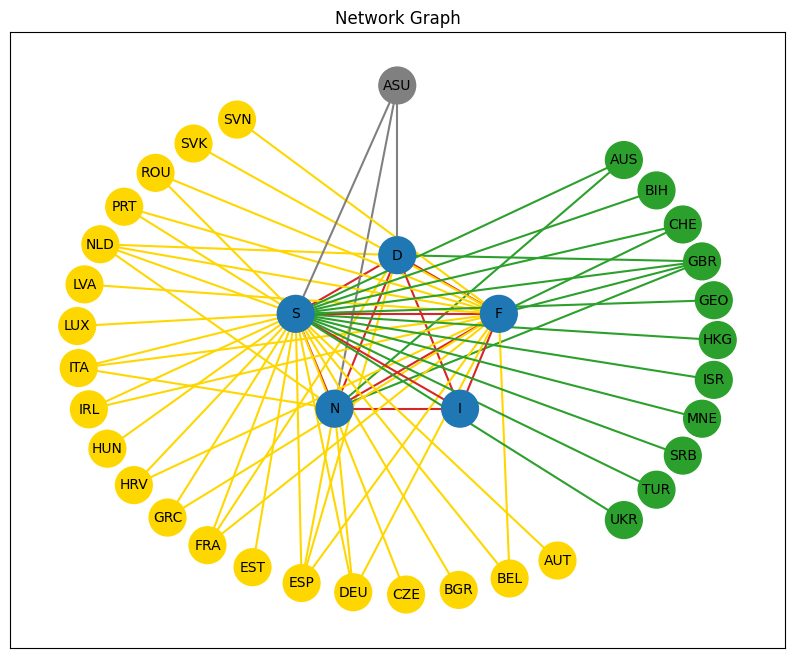

In [65]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the network assignment CSV file
network_file_path = "networks_assignment.csv"
df = pd.read_csv(network_file_path)

# Define node groups
blue_nodes = {'D', 'F', 'I', 'N', 'S'}
green_nodes = {'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA'}
yellow_nodes = {'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'}

# Create a graph
G = nx.Graph()

# Add edges based on the adjacency matrix
top_labels = df.columns[1:]  # Exclude the first column (node labels)
for _, row in df.iterrows():
    source = row['LABELS']
    for target, value in row.items():
        if target in top_labels and value > 0:
            G.add_edge(source, target, weight=value)

# Define positions manually for pentagram centered at (0,0)
angle = np.pi / 2  # Start from the top
radius = 0.5  # Scale factor to ensure it's centered
pentagram_positions = {
    "D": (radius * np.cos(angle), radius * np.sin(angle)),
    "F": (radius * np.cos(angle - 2 * np.pi / 5), radius * np.sin(angle - 2 * np.pi / 5)),
    "I": (radius * np.cos(angle - 4 * np.pi / 5), radius * np.sin(angle - 4 * np.pi / 5)),
    "N": (radius * np.cos(angle - 6 * np.pi / 5), radius * np.sin(angle - 6 * np.pi / 5)),
    "S": (radius * np.cos(angle - 8 * np.pi / 5), radius * np.sin(angle - 8 * np.pi / 5))
}

# Explicitly define pentagram edges to form a five-pointed star

# Arrange remaining nodes in a circular layout further from the center
remaining_nodes = set(G.nodes) - set(pentagram_positions.keys())
circle_positions = nx.circular_layout(remaining_nodes)
for node in circle_positions:
    circle_positions[node] = (circle_positions[node][0] * 2, circle_positions[node][1] * 2)  # Expand outer nodes

# Merge positions
positions = {**pentagram_positions, **circle_positions}

# Assign colors
node_colors = []
for node in G.nodes:
    if node in blue_nodes:
        node_colors.append('tab:blue')
    elif node in green_nodes:
        node_colors.append('tab:green')
    elif node in yellow_nodes:
        node_colors.append('gold')
    else:
        node_colors.append('gray')

# Separate nodes into clusters
remaining_nodes = set(G.nodes) - set(pentagram_positions.keys())
green_cluster = sorted(remaining_nodes & green_nodes)
yellow_cluster = sorted(remaining_nodes & yellow_nodes)
other_cluster = sorted(remaining_nodes - green_nodes - yellow_nodes)

# Define cluster positions in separate arcs around the pentagram
def arrange_in_arc(nodes, center, radius, start_angle, arc_span):
    """Arrange nodes in an arc around a given center."""
    positions = {}
    step = arc_span / max(1, len(nodes) - 1) if len(nodes) > 1 else 0
    for i, node in enumerate(nodes):
        angle = start_angle - i * step
        positions[node] = (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle))
    return positions



# Arrange nodes in grouped arcs around the pentagram
green_positions = arrange_in_arc(green_cluster, (0, 0), 1.5, np.pi / 4, np.pi / 2)  # Upper arc

# Adjust the spacing of yellow nodes by increasing the arc span
yellow_positions = arrange_in_arc(yellow_cluster, (0, 0), 1.5, -np.pi / 3, np.pi)  # Wider arc for more spacing

# Arrange other nodes in a separate arc further from the center
other_positions = arrange_in_arc(other_cluster, (0, 0), 1.5, np.pi/2, -np.pi/2)  # Separate arc for extra nodes

# Merge all updated positions
positions = {**pentagram_positions, **green_positions, **yellow_positions, **other_positions}

# Assign edge colors based on the simplified rule
edge_colors = []
for u, v in G.edges():
    if u in blue_nodes and v in blue_nodes:
        edge_colors.append('tab:red')
    elif (u in blue_nodes and v in green_nodes) or (v in blue_nodes and u in green_nodes):
        edge_colors.append('tab:green')
    elif (u in blue_nodes and v in yellow_nodes) or (v in blue_nodes and u in yellow_nodes):
        edge_colors.append('gold')
    else:
        edge_colors.append('gray')  # Default color for all other edges


# Draw network graph with edge colors
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos=positions, node_color=node_colors, node_size=700)
nx.draw_networkx_labels(G, pos=positions, font_size=10)
nx.draw_networkx_edges(G, pos=positions, edge_color=edge_colors, width=1.5)  # Apply assigned edge colors
plt.title("Network Graph")
plt.show()

